In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [95]:
# Load dataset
df = pd.read_csv("netflix_titles.csv")

In [96]:
# Overview
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [97]:
# Shape and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [98]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [99]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


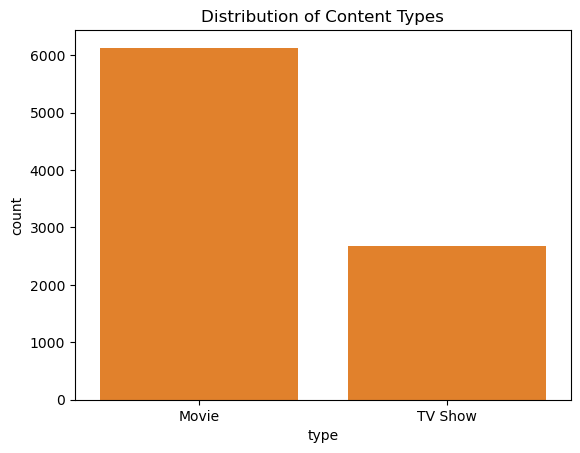

In [104]:
# Type distribution
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Types")
plt.show()

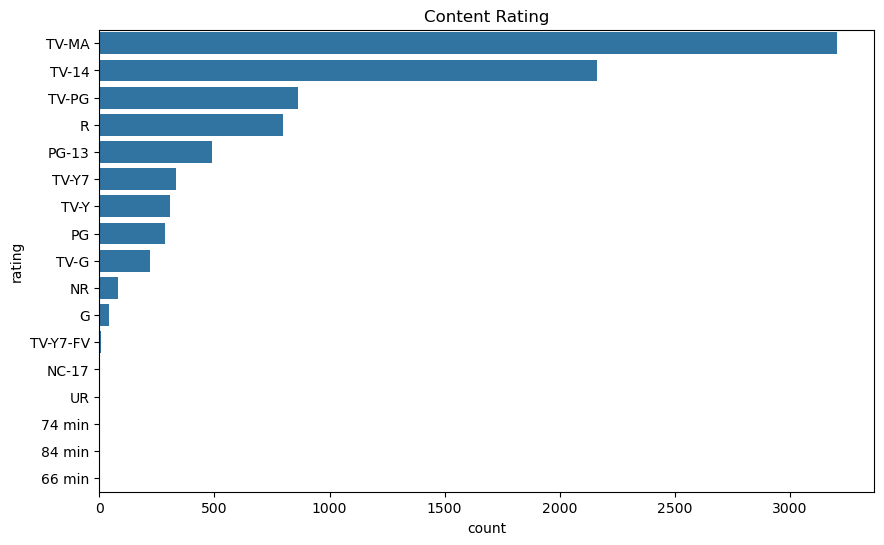

In [108]:
# rating distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Content Rating')
plt.show()

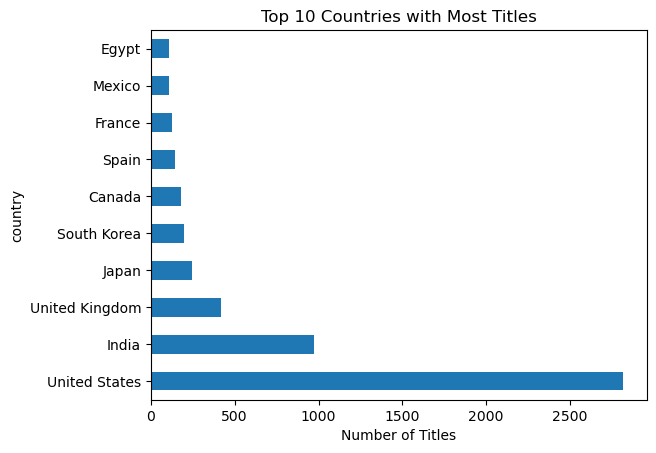

In [109]:
# Country frequency (Top 10)
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Countries with Most Titles')
plt.xlabel("Number of Titles")
plt.show()

In [113]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

In [ ]:
# str.strip() removes the unwanted spaces.

# errors='coerce' ensures invalid/missing dates become NaT instead of throwing an error — great for messy datasets.

In [114]:
# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

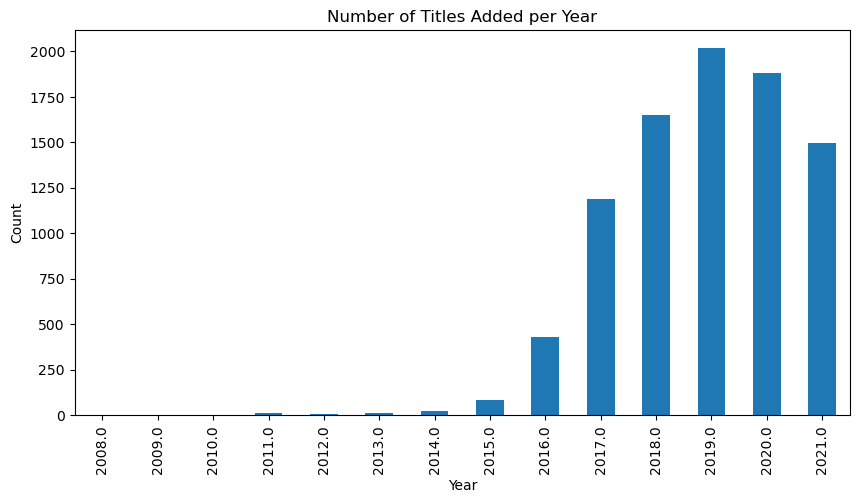

In [117]:
# Titles added per year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Number of Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

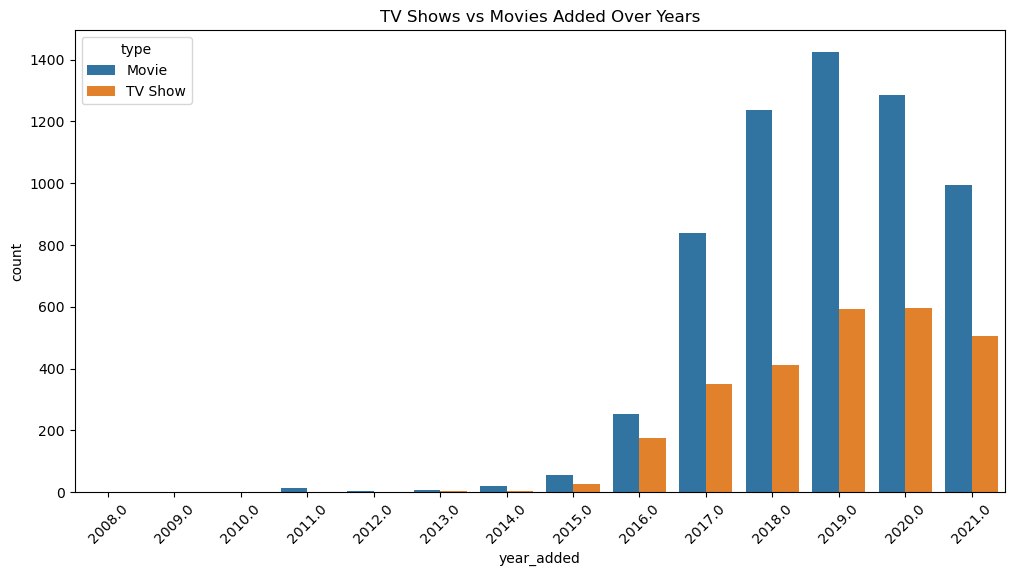

In [118]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', hue='type', order=sorted(df['year_added'].dropna().unique()))
plt.title("TV Shows vs Movies Added Over Years")
plt.xticks(rotation=45)
plt.show()

# Duration & Outlier Detection

In [119]:
# Split 'duration' into numeric value and unit
df[['duration_int', 'duration_type']] = df['duration'].str.extract('(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'])

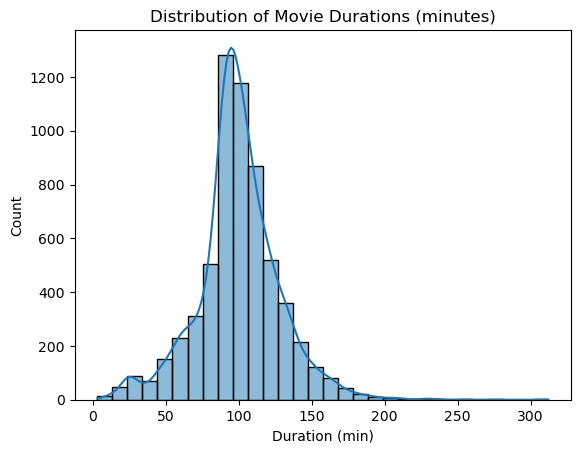

In [120]:
# Duration distribution for movies
sns.histplot(df[df['type'] == 'Movie']['duration_int'].dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Durations (minutes)")
plt.xlabel("Duration (min)")
plt.show()

### Initial Hypotheses for Modeling


In [ ]:
# 1. Movies are added more frequently than TV Shows after 2017.
# 2. TV-MA and TV-14 are the most common content ratings.
# 3. United States and India dominate Netflix content production.
# 4. Duration (minutes/seasons) could be a predictive feature to classify `type`.
# 5. Genres (from `listed_in`) can be grouped and used in a recommendation engine or clustering model.
# 6. Titles released in earlier years tend to be added more recently (Netflix archives more old content).